In [2]:
import Pkg; Pkg.activate("..\\.")
using WaterLily
include("..\\examples\\TwoD_plots.jl")
gr(show = :ijulia)

 Activating environment at `C:\Users\admin\Documents\GitHub\WaterLily\Project.toml`
┌ Info: Precompiling WaterLily [ed894a53-35f9-47f1-b17f-85db9237eebd]
└ @ Base loading.jl:1278


Plots.GRBackend()

The [Taylor-Green Vortex](https://en.wikipedia.org/wiki/Taylor%E2%80%93Green_vortex) in 2D is defined with initial conditions

$$ 
V_x = -U\sin(x)\cos(y),\ V_y = U\cos(x)\sin(y)
$$

I can implement that in [WaterLily](https://github.com/weymouth/WaterLily) using:

In [3]:
function TGVortex(;p=7,N=[1,10],Re=100)
    # Define vortex size, velocity, viscosity
    L = 2^p; U = 1; ν = U*L/Re

    # Taylor-Green-Vortex initial velocity field
    V = apply(L+2,L+2,2) do i,vx
        x,y = @. (vx-1.5)*2π/L          # scaled coordinates
        i==1 && return -U*sin(x)*cos(y) # V_x
        i==2 && return  U*cos(x)*sin(y) # V_y
    end

    # Initialize simulation
    c = ones(L+2,L+2,2)  # no immersed solids
    a = Flow(V,c,zeros(2),ν=ν)
    b = MultiLevelPoisson(c)
    return Simulation(U,L,a,b),L
end

TGVortex (generic function with 1 method)

Running the cell below evolves this initial condition over time. Notice that the time scale of the decay is set by the Reynolds number. 

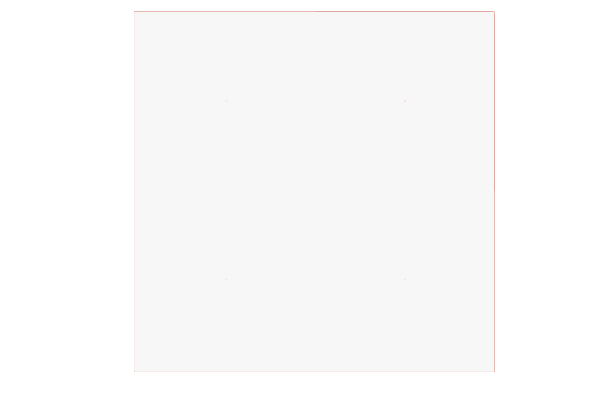

In [4]:
sim,L = TGVortex(Re=100)
tprint = WaterLily.sim_time(sim)

nprint,Δprint = 75,0.05
for i ∈ 0:nprint
    tprint+=Δprint
    sim_step!(sim,tprint)
    @inside sim.flow.σ[I] = WaterLily.curl(3,I,sim.flow.u)*L
    flood(sim.flow.σ,clims=(-5,5),legend=false,border=:none)
end

In 3D we get something else entirely